**Importiere die notwendigen Packages**

In [33]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [34]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_bev_aufenthaltsdauer_wegzug_alter_geschlecht_herkunft_stadtkreis_od5251

(int_dwh)

In [35]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/bev_aufenthaltsdauer_wegzug_alter_geschlecht_herkunft_stadtkreis_od5251/BEV525OD5251.csv"

# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [36]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [37]:
data2betested.head(3)

,StichtagDatJahr,AlterV20Kurz,AlterV20Sort,SexCd,SexKurz,HerkunftCd,HerkunftLang,KreisCd,KreisLang,AufDauerP25,AufDauerMedian,AufDauerP75,AufDauerMittel
0,1993,0-19,1,1,M,1,Schweizer/in,1,Kreis 1,0,1,2,2
1,1993,0-19,1,1,M,1,Schweizer/in,2,Kreis 2,1,3,8,5
2,1993,0-19,1,1,M,1,Schweizer/in,3,Kreis 3,1,2,5,4


In [38]:
data2betested.dtypes

StichtagDatJahr      int64
AlterV20Kurz        object
AlterV20Sort         int64
SexCd                int64
SexKurz             object
HerkunftCd           int64
HerkunftLang        object
KreisCd              int64
KreisLang           object
AufDauerP25        float64
AufDauerMedian     float64
AufDauerP75        float64
AufDauerMittel     float64
dtype: object

In [39]:
data2betested.shape

(6562, 13)

Beschreibe einzelne Attribute

In [40]:
data2betested.describe()

,StichtagDatJahr,AlterV20Sort,SexCd,HerkunftCd,KreisCd,AufDauerP25,AufDauerMedian,AufDauerP75,AufDauerMittel
count,6562,6562,6562,6562,6562,6562,6562,6562,6562
mean,2007,3,2,1,7,6,12,20,14
std,8,1,1,0,3,11,16,21,15
min,1993,1,1,1,1,0,0,0,0
25%,1999,2,1,1,4,0,1,4,4
50%,2006,3,2,1,7,1,3,10,7
75%,2014,4,2,2,10,4,15,31,18
max,2020,5,2,2,12,75,86,94,80


Wie viele Nullwerte gibt es im Datensatz?

In [41]:
data2betested.isnull().sum()

StichtagDatJahr    0
AlterV20Kurz       0
AlterV20Sort       0
SexCd              0
SexKurz            0
HerkunftCd         0
HerkunftLang       0
KreisCd            0
KreisLang          0
AufDauerP25        0
AufDauerMedian     0
AufDauerP75        0
AufDauerMittel     0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [42]:
data2betested['StichtagDatJahr']=pd.to_datetime(data2betested['StichtagDatJahr'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested

,StichtagDatJahr,AlterV20Kurz,AlterV20Sort,SexCd,SexKurz,HerkunftCd,HerkunftLang,KreisCd,KreisLang,AufDauerP25,AufDauerMedian,AufDauerP75,AufDauerMittel
0,1993-01-01,0-19,1,1,M,1,Schweizer/in,1,Kreis 1,0,1,2,2
1,1993-01-01,0-19,1,1,M,1,Schweizer/in,2,Kreis 2,1,3,8,5
2,1993-01-01,0-19,1,1,M,1,Schweizer/in,3,Kreis 3,1,2,5,4
3,1993-01-01,0-19,1,1,M,1,Schweizer/in,4,Kreis 4,0,1,5,4
4,1993-01-01,0-19,1,1,M,1,Schweizer/in,5,Kreis 5,1,2,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,2020-01-01,80 u. älter,5,2,W,2,Ausländer/in,8,Kreis 8,1,29,57,29
6558,2020-01-01,80 u. älter,5,2,W,2,Ausländer/in,9,Kreis 9,27,34,49,37
6559,2020-01-01,80 u. älter,5,2,W,2,Ausländer/in,10,Kreis 10,0,0,0,0
6560,2020-01-01,80 u. älter,5,2,W,2,Ausländer/in,11,Kreis 11,32,48,52,41


Bereite die Daten für die Grafik unten vor

In [43]:
Jahre = data2betested.groupby("StichtagDatJahr")
len(Jahre)

28

In [44]:
for key, group in Jahre:
    print(key, len(group))

1993-01-01 00:00:00 236
1994-01-01 00:00:00 233
1995-01-01 00:00:00 238
1996-01-01 00:00:00 233
1997-01-01 00:00:00 233
1998-01-01 00:00:00 237
1999-01-01 00:00:00 236
2000-01-01 00:00:00 236
2001-01-01 00:00:00 234
2002-01-01 00:00:00 230
2003-01-01 00:00:00 231
2004-01-01 00:00:00 236
2005-01-01 00:00:00 235
2006-01-01 00:00:00 234
2007-01-01 00:00:00 231
2008-01-01 00:00:00 233
2009-01-01 00:00:00 231
2010-01-01 00:00:00 229
2011-01-01 00:00:00 234
2012-01-01 00:00:00 232
2013-01-01 00:00:00 236
2014-01-01 00:00:00 236
2015-01-01 00:00:00 234
2016-01-01 00:00:00 238
2017-01-01 00:00:00 238
2018-01-01 00:00:00 237
2019-01-01 00:00:00 235
2020-01-01 00:00:00 236


In [45]:
myJahr = "2020-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr

,StichtagDatJahr,AlterV20Kurz,AlterV20Sort,SexCd,SexKurz,HerkunftCd,HerkunftLang,KreisCd,KreisLang,AufDauerP25,AufDauerMedian,AufDauerP75,AufDauerMittel
6326,2020-01-01,0-19,1,1,M,1,Schweizer/in,1,Kreis 1,1,3,5,5
6327,2020-01-01,0-19,1,1,M,1,Schweizer/in,2,Kreis 2,1,3,6,5
6328,2020-01-01,0-19,1,1,M,1,Schweizer/in,3,Kreis 3,1,3,7,5
6329,2020-01-01,0-19,1,1,M,1,Schweizer/in,4,Kreis 4,1,2,7,5
6330,2020-01-01,0-19,1,1,M,1,Schweizer/in,5,Kreis 5,1,2,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,2020-01-01,80 u. älter,5,2,W,2,Ausländer/in,8,Kreis 8,1,29,57,29
6558,2020-01-01,80 u. älter,5,2,W,2,Ausländer/in,9,Kreis 9,27,34,49,37
6559,2020-01-01,80 u. älter,5,2,W,2,Ausländer/in,10,Kreis 10,0,0,0,0
6560,2020-01-01,80 u. älter,5,2,W,2,Ausländer/in,11,Kreis 11,32,48,52,41


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [46]:
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()

# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    
test = data2betested.groupby(
   ['StichtagDatJahr', 'AlterV20Sort', 'AlterV20Kurz']
).agg(
    {
         'AufDauerMittel':"mean",    # Sum --> (sum)
         'AufDauerP25': "mean",  # get the count of networks
         'AufDauerP75': 'mean'  # get the first date per group
    }
)
test
    

AufDauerMittel  AufDauerP25  AufDauerP75
StichtagDatJahr AlterV20Sort AlterV20Kurz                                          
1993-01-01      1            0-19                       3            1            4
                2            20-39                      4            1            5
                3            40-59                      9            2           13
                4            60-79                     19            6           29
                5            80 u. älter               36           20           53
...                                                   ...          ...          ...
2020-01-01      1            0-19                       4            1            5
                2            20-39                      5            1            6
                3            40-59                      9            2           14
                4            60-79                     20            5           32
                5            80 u. älter               36           18           53

[140 rows x 3 columns]

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [47]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [80]:
mySelection = data2betested[(data2betested.StichtagDatJahr>"2016-01-01") & (data2betested.SexCd==1)]

mySelection.head()



,StichtagDatJahr,AlterV20Kurz,AlterV20Sort,SexCd,SexKurz,HerkunftCd,HerkunftLang,KreisCd,KreisLang,AufDauerP25,AufDauerMedian,AufDauerP75,AufDauerMittel
5616,2017-01-01,0-19,1,1,M,1,Schweizer/in,1,Kreis 1,1,2,3,4
5617,2017-01-01,0-19,1,1,M,1,Schweizer/in,2,Kreis 2,2,4,9,6
5618,2017-01-01,0-19,1,1,M,1,Schweizer/in,3,Kreis 3,1,4,11,6
5619,2017-01-01,0-19,1,1,M,1,Schweizer/in,4,Kreis 4,1,1,4,3
5620,2017-01-01,0-19,1,1,M,1,Schweizer/in,5,Kreis 5,1,2,4,4


In [81]:
#mySelection = aktuellesJahr[["StatZoneSort","AnzBestWir"]]
#mySelection

In [82]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['AufDauerMedian'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(mySelection).encode(
    x='StichtagDatJahr:N',
    y='KreisCd',
    color='AufDauerMedian'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [83]:
alt.Chart(data2betested).mark_circle(size=60).encode(
    x='KreisLang',
    y='StichtagDatJahr:N',
    color='AufDauerMedian',
    tooltip=['KreisLang','StichtagDatJahr','AufDauerMedian']
).interactive() # this makes the axes interactive: now you can zoom & pan



MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

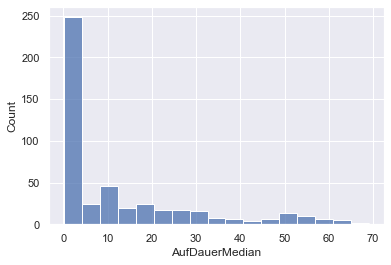

In [84]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=mySelection, x="AufDauerMedian") #, y="KonOGDKurz")
plt.show();

Test: Choroplethenkarte

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [85]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Filepath statzonen
input_stadtkreise = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_stadtkreise_a.json"
df_stadtkreise = gpd.read_file(input_stadtkreise)
df_stadtkreise.head(2)
#df_stadtkreise.dtypes


,objid,bezeichnung,name,entstehung,geometry
0,6,Kreis 7,7,6,"POLYGON ((8.54885 47.36602, 8.54901 47.36601, ..."
1,10,Kreis 11,11,4,"POLYGON ((8.55562 47.40129, 8.55581 47.40160, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

In [86]:
stats_agg_kreis=aktuellesJahr.groupby(['KreisLang','SexKurz','HerkunftLang'])['AufDauerMedian'].sum()
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()
stats_agg_kreis.head()
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()

KreisLang  SexKurz  HerkunftLang
Kreis 1    M        Ausländer/in     8
                    Schweizer/in    80
           W        Ausländer/in     3
                    Schweizer/in   108
Kreis 10   M        Ausländer/in    47
Name: AufDauerMedian, dtype: float64

In [87]:
# Rename attribute stznr to StatZoneSort, so the IDs have the same name

stadtkreise_shapes = df_stadtkreise[['geometry', 'name', 'bezeichnung']].rename(columns={'bezeichnung': 'KreisLang'})

# Merge with `merge` method on shared variable (stznr und StatZoneSort):
stadtkreise_shapes_aktJahr = stadtkreise_shapes.merge(stats_agg_kreis, on='KreisLang')

stadtkreise_shapes_aktJahr.head(3)


,geometry,name,KreisLang,AufDauerMedian
0,"POLYGON ((8.54885 47.36602, 8.54901 47.36601, ...",7,Kreis 7,49
1,"POLYGON ((8.54885 47.36602, 8.54901 47.36601, ...",7,Kreis 7,60
2,"POLYGON ((8.54885 47.36602, 8.54901 47.36601, ...",7,Kreis 7,14


<AxesSubplot:>

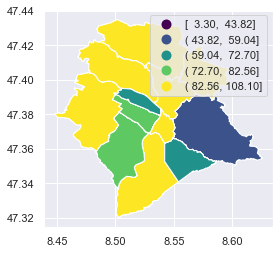

In [88]:
# Plot by StatZonen

stadtkreise_shapes_aktJahr.plot(column='AufDauerMedian', cmap='viridis', scheme='quantiles', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html



Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html

**Sharepoint als gecheckt markieren!**

Record auf Sharepoint: **[Link](http://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/EditForm.aspx?ID=497&Source=%2Forga%2Fssz%2Dprodukte%2FLists%2FSASA%5FOutputs)**